<a href="https://colab.research.google.com/github/Om-2001/Amazon_Web_Scraping/blob/main/Amazon_Web_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np

# ALL THE PAGES AND THE PRODUCTS OF WATCHES

In [110]:
def prod_desc(new_soup):
  try:
    result = new_soup.find("span", attrs={'id':'productTitle'}).text.strip()
  except:
    result = np.nan
  return result

def review(new_soup):
  try:
    result = int(new_soup.find("span", attrs={'id':"acrCustomerReviewText", 'class':'a-size-base'}).text.strip().split(' ')[0].replace(',',''))
  except:
    result = np.nan
  return result

def rating(new_soup):
  try:
    result = float(new_soup.find("a", attrs={'class':"a-popover-trigger a-declarative", 'role':"button"}).text.strip().split(" ")[0])
  except:
    result = np.nan
  return result

def price(new_soup):
  try:
    result = float(new_soup.find('span', attrs={"class":"a-price-whole"}).text.strip().replace(",",""))
  except:
    result = np.nan
  return result

d = {"Title":[], "Price":[], "Rating":[], "Review":[]}

In [142]:
HEADERS = ({'f{YOUR OWN HEADER}', 'Accept-Language':'en-US, en;q=0.5'})

In [115]:
for i in range(1, 8):
  URL = f'https://www.amazon.in/s?k=watches+for+men&page={i}&crid=3JWJPEUSAPX4L&qid=1703731753&sprefix=watch%2Caps%2C178&ref=sr_pg_7'
  soup = BeautifulSoup(requests.get(URL, headers=HEADERS).content, 'html.parser')
  list_links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
  for link in list_links:
    newpagelink = "https://amazon.in" + link.get('href')
    try:
      new_soup = BeautifulSoup(requests.get(newpagelink, headers=HEADERS).content, 'html.parser')
      d["Title"].append(prod_desc(new_soup))
      d['Price'].append(price(new_soup))
      d['Rating'].append(rating(new_soup))
      d['Review'].append(review(new_soup))
    except:
      continue


In [128]:
watches = pd.DataFrame(d)
watches = watches[~watches['Title'].isnull()]
watches = watches[~watches['Rating'].isnull()]

In [128]:
watches.sample(5)

,Title,Price,Rating,Review
206,BENYAR Wrist Watches for Men Leather Strap Ana...,2890.0,4.0,190.0
24,Casio Enticer Analog Dial Watch,5995.0,4.3,5296.0
199,Casio Enticer Analog Blue Dial Men MTP-VD01D-2...,2995.0,4.4,1047.0
34,Titan Maritime Analog Grey Dial Men's Watch NM...,17545.0,3.4,13.0
145,Timex Analog Black Dial Men's Watch-TWHG35SMU07,1857.0,4.3,358.0


In [129]:
watches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 285
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   254 non-null    object 
 1   Price   254 non-null    float64
 2   Rating  254 non-null    float64
 3   Review  254 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.9+ KB


In [131]:
watches.describe()

,Price,Rating,Review
count,254.000000,254.000000,254.000000
mean,4210.653543,4.111024,8338.007874
std,5085.732018,0.445305,22798.668218
min,240.000000,1.000000,2.000000
25%,1120.500000,4.000000,190.000000
50%,1999.000000,4.200000,905.000000
75%,5487.500000,4.300000,2488.500000
max,35799.000000,5.000000,144680.000000


# Visualisation

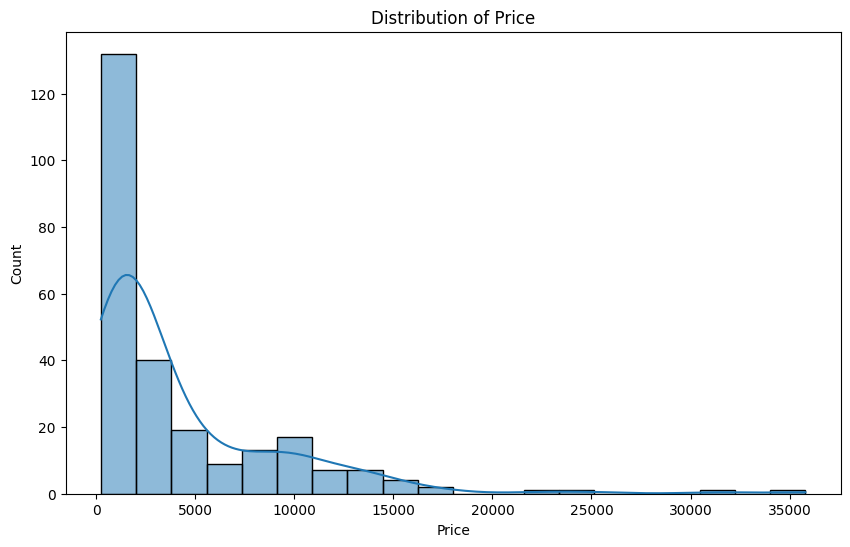

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(watches['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

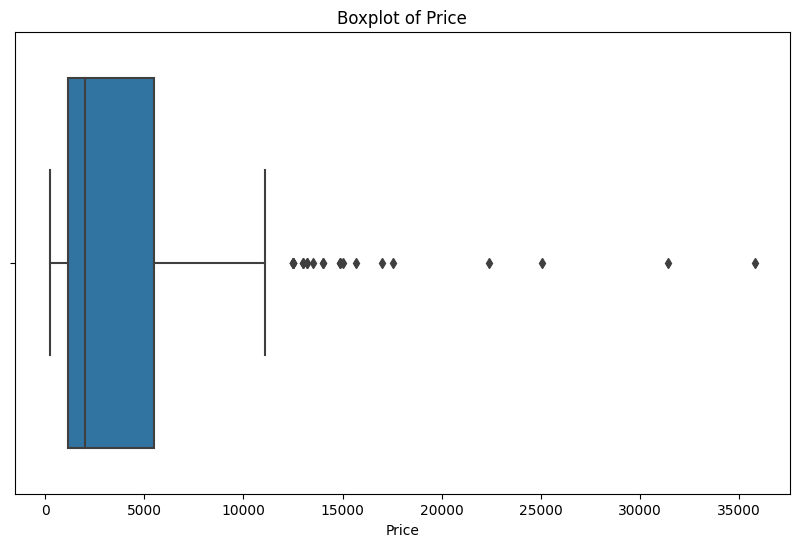

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=watches['Price'])
plt.title('Boxplot of Price')
plt.show()

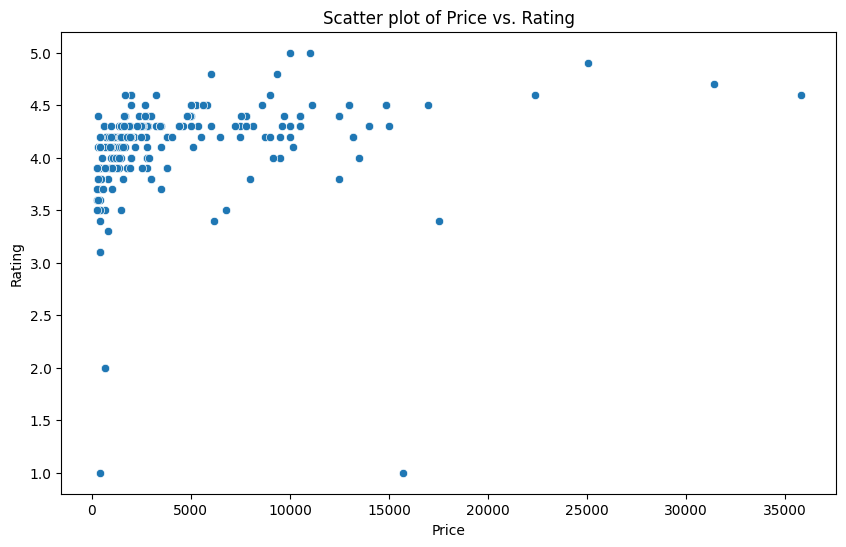

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=watches)
plt.title('Scatter plot of Price vs. Rating')
plt.show()

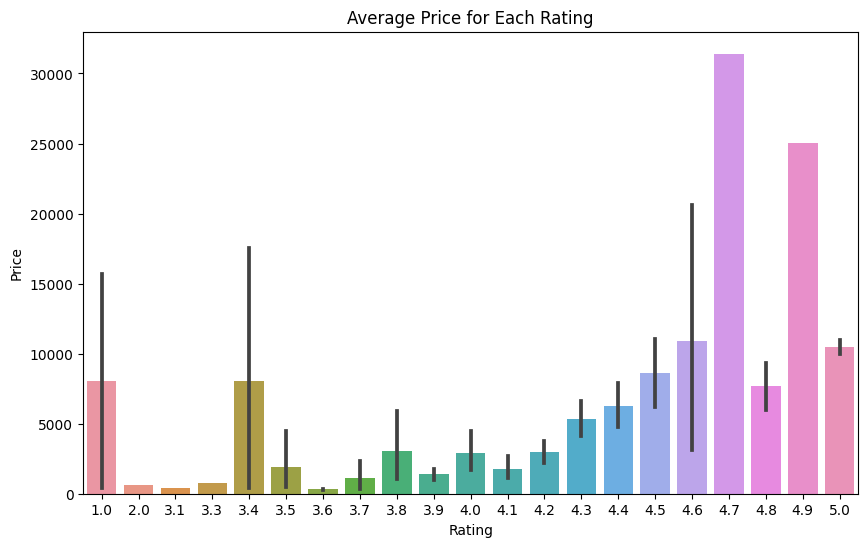

In [137]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Price', data=watches)
plt.title('Average Price for Each Rating')
plt.show()

In [140]:
# Filter for watches under 5000
watches_under_5000 = watches[watches['Price'] <= 5000].sort_values(by=['Review', 'Rating'], ascending=False).head(1)

# Filter for watches under 10000
watches_under_10000 = watches[(watches['Price'] > 5000) & (watches['Price'] <= 10000)].sort_values(by=['Review', 'Rating'], ascending=False).head(1)

# Filter for watches under 20000
watches_under_20000 = watches[(watches['Price'] > 10000) & (watches['Price'] <= 20000)].sort_values(by=['Review', 'Rating'], ascending=False).head(1)

print("Best watch under 5000:")
print(watches_under_5000[['Title', 'Price', 'Rating', 'Review']])

print("\nBest watch under 10000:")
print(watches_under_10000[['Title', 'Price', 'Rating', 'Review']])

print("\nBest watch under 20000:")
print(watches_under_20000[['Title', 'Price', 'Rating', 'Review']])

Best watch under 5000:
                                                 Title   Price  Rating  \
119  boAt Xtend Smart Watch with Alexa Built-in, 1....  1699.0     4.1   

       Review  
119  144680.0  

Best watch under 10000:
                              Title   Price  Rating  Review
24  Casio Enticer Analog Dial Watch  5995.0     4.3  5296.0

Best watch under 20000:
                                            Title    Price  Rating  Review
84  Fossil Analog Black Dial Men's Watch - FS5437  12495.0     4.4  2246.0


In [141]:
watches.to_csv('Watches_for_Men.csv')